Problem 1: Defect Prediction


In [52]:
import pandas as pd

# Load the dataset
defect_data = pd.read_csv('/content/defect_prediction_data.csv')

# Display basic information about the dataset
defect_data.info()

# Display the first few rows of the dataset to understand its structure
defect_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code_Changes            1000 non-null   int64  
 1   Time_Since_Last_Change  1000 non-null   int64  
 2   Complexity_Metric       1000 non-null   float64
 3   Reported_Defects        1000 non-null   int64  
 4   Timestamp               1000 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 39.2+ KB


,Code_Changes,Time_Since_Last_Change,Complexity_Metric,Reported_Defects,Timestamp
0,52,2,1.021936,0,2023-02-25
1,93,27,8.542098,0,2023-01-08
2,15,24,5.270241,1,2023-09-02
3,72,27,8.259208,1,2023-11-10
4,61,13,2.983744,0,2023-05-07


Data Understanding and Preparation

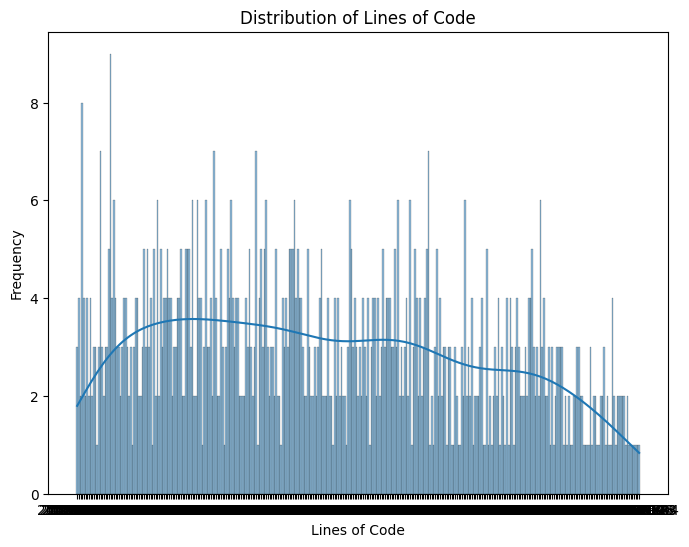

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check missing values
defect_data.isnull().sum()

# Summary statistics for numerical columns
defect_data.describe()

# Explore categorical columns (example for a column named 'Category')
defect_data['Timestamp'].value_counts()

# Visualize relationships and distributions (example: histogram of 'Lines of Code')
plt.figure(figsize=(8, 6))
sns.histplot(defect_data['Timestamp'], bins=30, kde=True)
plt.xlabel('Lines of Code')
plt.ylabel('Frequency')
plt.title('Distribution of Lines of Code')
plt.show()


Feature Selection

In [57]:
selected_features = ['Timestamp', 'Reported_Defects', 'Complexity_Metric', 'Time_Since_Last_Change', 'Code_Changes']
data_selected_features = defect_data[selected_features]


Data Preprocessing

In [58]:
# Example: Handle missing values (replace NaNs with mean)
data_selected_features.fillna(data_selected_features.mean(), inplace=True)

# Encode categorical variables (if applicable)
data_encoded = pd.get_dummies(data_selected_features)


<ipython-input-58-84447bb15efd>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_selected_features.fillna(data_selected_features.mean(), inplace=True)


Splitting Data into Features and Target

In [60]:
X = data_encoded.drop('Reported_Defects', axis=1)  # Features
y = data_encoded['Reported_Defects']  # Target variable


Model Building

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Example model, you can choose any suitable model

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = DecisionTreeClassifier()  # Example model, replace with your choice
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)


Evaluation:

Evaluate the model's performance using appropriate metrics for classification tasks (accuracy, precision, recall, F1-score,support)

In [62]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Other classification metrics
print(classification_report(y_test, predictions))


Accuracy: 0.455
              precision    recall  f1-score   support

           0       0.47      0.47      0.47       102
           1       0.44      0.44      0.44        98

    accuracy                           0.46       200
   macro avg       0.45      0.45      0.45       200
weighted avg       0.45      0.46      0.45       200



Refining the Model

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Example: RandomForestClassifier with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the tuned model
tuned_predictions = best_model.predict(X_test)


Evaluation and Model Validation

In [64]:
from sklearn.model_selection import cross_val_score

# Cross-validation scores
cv_scores = cross_val_score(best_model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)


Cross-Validation Scores: [0.56  0.53  0.52  0.49  0.555]


Advanced Model Evaluation

ROC-AUC Score: 0.4378751500600241


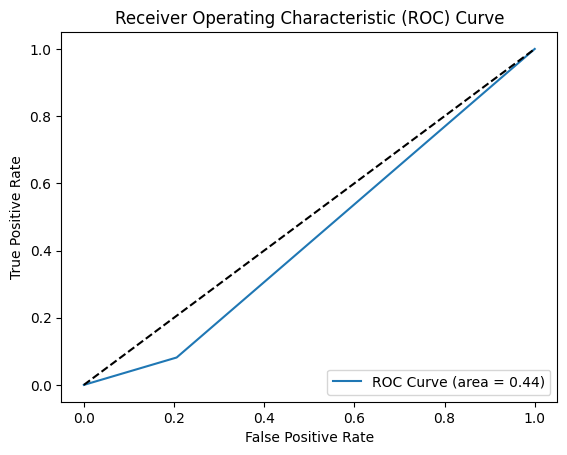

Confusion Matrix:
[[81 21]
 [90  8]]


In [66]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, tuned_predictions)
print("ROC-AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, tuned_predictions)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, tuned_predictions)
print("Confusion Matrix:")
print(conf_matrix)
